In [34]:
import numpy as np
import sympy, scipy, cmath
from scipy import sparse as sp
from scipy.sparse import  coo_matrix as cmm
from matplotlib import pyplot as pp
from scipy import optimize as opt

In [85]:
#Parameters
#default values: mu=1.8 m=.5 t=3 alR=.7 B=3.07 delta=.5 phi=Pi

kx=0.
En=0.

mu=1.8
muSC=10
m=.5
t=5.
alR=0.
B=3.07
delta=.5
phi=np.pi*1.5

def mut(kx):
    return mu-2*t-kx**2/(2*m)-alR**2*m/2
def kF(mu):
    return cmath.sqrt(2*m*mu)
def a(t):
    return 1/cmath.sqrt(2*m*t)

def delL(phi):
    return delta*cmath.exp(1j*phi/2)
def delR(phi):
    return delta*cmath.exp(-1j*phi/2)
def nu0(m):
    return m/(2*np.pi)
def xiE(En):
    return kF(mu)/(m*cmath.sqrt(delta**2-En**2))

tL=2.
tR=tL

NJ=15
gamma=np.pi*nu0(m)*tL**2

W=2.#(NJ+1)*a(t)

#matrix tools
eye2=np.eye(2)
eye4=np.eye(4)
s1=[[0,1],[1,0]]
s2=[[0,-1j],[1j,0]]
s3=[[1,0],[0,-1]]
tP=np.kron([[0,1],[0,0]],eye2)
tM=np.kron([[0,0],[1,0]],eye2)
t3=np.kron(s3,eye2)

In [ ]:
a(t)

In [86]:
#self-energy
def overlap(n,m):
    return np.sin(n*np.pi*a(t)/W)*np.sin(m*np.pi*a(t)/W)
def selfE(En,n,m):
    dynR=np.sqrt(delta**2-En**2)
    selfEL=-2*gamma/W*(En/dynR*eye4-delL(phi)/dynR*tP-np.conj(delL(phi))/dynR*tM)*overlap(n,m)
    selfER=-2*gamma/W*(En/dynR*eye4-delR(phi)/dynR*tP-np.conj(delR(phi))/dynR*tM)*overlap(n,m)
    return selfEL+selfER

In [87]:
#hamiltonian in channel space
def kin(n):
    return np.pi**2*n**2/(2*m*W**2)-mu
def HamC(En,B):
    dd=[[En-B-kin(i),En+B-kin(i),En-B+kin(i),En+B+kin(i)] for i in range(1,NJ+1)]
    return np.ndarray.tolist(np.asarray(dd).reshape(1,4*NJ)[0])

In [88]:
#full inverse GF

def GJm1(En,B): return cmm(np.diag(HamC(En,B)))
def fullSelf(En):
    newmat=sp.hstack([cmm(selfE(En,1,n)) for n in range(1,NJ+1)])
    for m in range(2,NJ+1):
        newline=sp.hstack([cmm(selfE(En,m,n)) for n in range(1,NJ+1)])
        newmat=sp.vstack([newmat,newline])
    return newmat
def Gm1(En,B): return GJm1(En,B)+fullSelf(En)

In [91]:
En=0

def fdetB(B):
    return np.linalg.det(Gm1(En,B).todense())/(mu**(4*(2*t+mu)*(NJ+2))) #norm

Bmin=0.
Bmax=10.
Barray=[]
x0roots=np.linspace(Bmin,Bmax+0.1,np.int((Bmax-Bmin)/0.2))
#norm=max(max(mu,t,alR,delta,tL**2)**((2*t+mu)*(NJ+2)),Bmax**(4*(NJ+2)))
for i in range(len(x0roots)):
    print(i)
    x0=x0roots[i]
    solekx=opt.fsolve(fdetB,np.asarray(x0))
    if abs(fdetB(solekx))>10**-6 or solekx<=0:# or solekx>2*np.pi+0.1 :
        solekx=[]
    solekx=np.ndarray.tolist(np.around(solekx,10))
    print(solekx)
    Barray.extend(solekx)
Barray=sorted(list(set(Barray)))

0


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in cdouble_scalars
  after removing the cwd from sys.path.


[]
1
[0.9717602678]
2
[0.9717602678]
3
[0.9717602678]
4
[0.9717602678]
5
[0.9717602678]
6
[0.9717602678]
7
[0.9717602678]
8
[0.9717602678]
9
[0.9717602678]
10
[0.9717602678]
11
[0.9717602678]
12
[0.9717602678]
13
[0.9717602678]
14
[0.9717602678]
15
[0.9717602678]
16
[0.9717602678]
17
[0.9717602678]
18
[0.9717602678]
19
[0.9717602678]
20
[0.9717602678]
21
[0.9717602678]
22
[0.9717602678]
23
[0.9717602678]
24
[0.9717602678]
25
[0.9717602678]
26
[]
27
[0.9717602678]
28
[5.7714285714]
29
[8.3803649764]
30
[8.3803649764]
31
[0.9717602678]
32
[8.3803649764]
33
[8.3803649764]
34
[8.3803649764]
35
[8.3803649764]
36
[8.3803649764]
37
[8.3803649764]
38
[8.3803649764]
39
[8.3803649764]
40
[8.3803649764]
41
[8.3803649764]
42
[8.3803649764]
43
[8.3803649764]
44
[8.3803649764]
45
[8.3803649764]
46
[8.3803649764]
47
[8.3803649764]
48
[8.3803649764]
49
[8.3803649764]


In [ ]:
print(Barray)

In [61]:
Barray2.extend(Barray)

In [65]:
Barray[7:8]=[]

In [101]:
Barray.insert(0,0.05)

7 MISSING transitions


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in arccos
  # This is added back by InteractiveShellApp.init_path()


Text(0,0.5,'n')

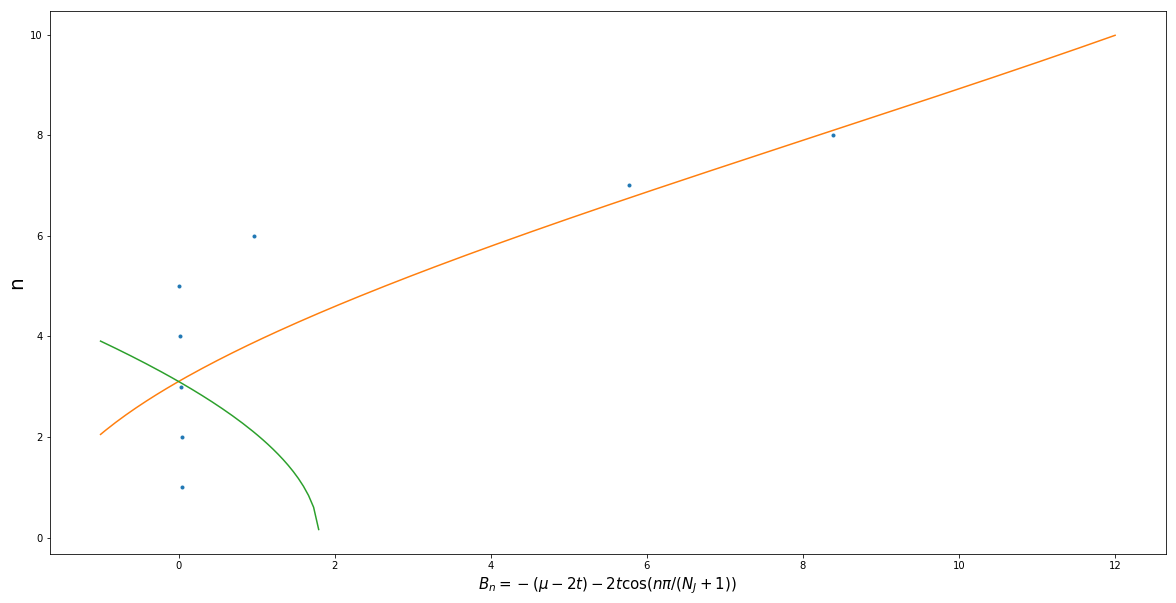

In [102]:
pp.figure(figsize=(20,10))

pp.plot(Barray,range(1,len(Barray)+1),'.')
if len(Barray)==NJ:
    print("ALL transitions shown")
else:
    print("{} MISSING transitions".format(NJ-len(Barray)))

xbarray=np.linspace(-1,12,201)
ybarray=(NJ+1)/np.pi*np.arccos((xbarray+(mu-2*t))/(-2*t))
ybarray2=(NJ+1)/np.pi*np.arccos((xbarray-(mu-2*t))/(+2*t))
pp.plot(xbarray,ybarray)
pp.plot(xbarray,ybarray2)
pp.xlabel('$B_n=-(\mu-2t)-2t \cos(n \pi/(N_J+1))$',fontsize=15)
pp.ylabel('n',fontsize=20)
#pp.axis([-0.1,11,1-0.1,10])